In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Input

In [46]:
train = pd.read_csv("UNSW_NB15_training-set.csv")
test = pd.read_csv("UNSW_NB15_testing-set.csv")
list_events = pd.read_csv("UNSW-NB15_LIST_EVENTS.csv")
features = pd.read_csv("NUSW-NB15_features.csv", encoding='cp1252')

In [47]:
print(train.shape, test.shape)
if train.shape[0]<100000:
    print("Train test sets are reversed. Fixing them.")
    train, test = test, train


(82332, 45) (175341, 45)
Train test sets are reversed. Fixing them.


In [48]:
train['type'] = 'train'
test['type'] ='test'
total = pd.concat([train, test], axis=0, ignore_index=True)
total.drop(['id'], axis=1, inplace=True)

# List

In [49]:
list_events.shape

(208, 3)

In [50]:
list_events.head()

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [51]:
list_events['Attack category'].unique()

array(['normal', ' Fuzzers ', ' Fuzzers', ' Reconnaissance ',
       ' Shellcode ', 'Analysis', 'Backdoors', 'DoS', 'Exploits',
       'Generic', 'Reconnaissance', 'Shellcode', 'Worms', nan],
      dtype=object)

In [52]:
list_events['Attack subcategory'].unique()

array([nan, 'FTP', 'HTTP', 'RIP', 'SMB', 'Syslog', 'PPTP', ' FTP',
       'DCERPC', 'OSPF', 'TFTP', ' DCERPC ', ' OSPF', 'BGP', 'Telnet',
       'SNMP', ' SunRPC Portmapper (TCP) UDP Service',
       ' SunRPC Portmapper (TCP) TCP Service ',
       'SunRPC Portmapper (UDP) UDP Service', 'NetBIOS', 'DNS',
       'SunRPC Portmapper (UDP)', ' ICMP', ' SCTP', 'MSSQL', 'SMTP',
       'FreeBSD', 'HP-UX ', 'NetBSD ', 'AIX', 'SCO Unix', 'Linux',
       'Decoders', 'IRIX', 'OpenBSD', ' Mac OS X', 'BSD', 'Windows',
       'BSDi', 'Multiple OS', 'Solaris', 'HTML', 'Port Scanner', 'Spam ',
       ' ', ' Ethernet', ' Microsoft Office', ' VNC', 'IRC', 'RDP', 'TCP',
       'VNC', ' LDAP', ' Oracle ', ' TCP', ' TFTP', 'XINETD', ' IRC',
       ' SNMP', 'ISAKMP', 'NTP', 'CUPS', 'Hypervisor', 'ICMP', 'SunRPC',
       ' IMAP', 'Asterisk', 'Browser', 'Cisco Skinny', 'SIP', 'SSL',
       ' SMTP', 'IIS Web Server', 'Miscellaneous', 'RTSP',
       ' Common Unix Print System (CUPS)', ' SunRPC', 'IGMP',
       '

# Features

In [53]:
# features.head(features.shape[0])

features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [54]:
# the Name column has camel case values
features['Name'] = features['Name'].str.lower()
# the following 4 columns are address related and not in train dataset
features = features[~features['Name'].isin(['srcip', 'sport', 'dstip', 'dsport'])].reset_index()
features.drop(['index', 'No.'], axis=1, inplace=True)

# Data

In [55]:
normal = train[train['label']==0]
anomaly = train[train['label']==1]

# Difference with features 

In [56]:
print(sorted(set(train.columns) - set(features['Name'].values)))
print(sorted(set(features['Name'].values) - set(train.columns)))

['ct_src_ltm', 'dinpkt', 'dmean', 'id', 'rate', 'response_body_len', 'sinpkt', 'smean', 'type']
['ct_src_ ltm', 'dintpkt', 'dmeansz', 'ltime', 'res_bdy_len', 'sintpkt', 'smeansz', 'stime']


In [57]:
fix = {'ct_src_ ltm': 'ct_src_ltm', 'dintpkt': 'dinpkt', 'dmeansz': 'dmean', 'res_bdy_len': 'response_body_len', 'sintpkt': 'sinpkt', 'smeansz': 'smean'}
features['Name'] = features['Name'].apply(lambda x: fix[x] if x in fix else x)
features.to_csv('features.csv')

In [58]:
print(sorted(set(train.columns) - set(features['Name'].values)))
print(sorted(set(features['Name'].values) - set(train.columns)))

['id', 'rate', 'type']
['ltime', 'stime']


# Train 

In [59]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,type
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,0,0,0,1,1,0,Normal,0,train
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,2,0,0,0,1,6,0,Normal,0,train
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,3,0,0,0,2,6,0,Normal,0,train
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,3,1,1,0,2,1,0,Normal,0,train
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,40,0,0,0,2,39,0,Normal,0,train


In [60]:
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

* categorical: state, service, proto
* target  = attack_cat, label
* integer but categorial = is_sm_ips_ports, ct_state_ttl, is_ftp_login
* integer = spkts, dpkts, sbytes, dbytes, sttl, dttl, sload, dload, sloss, dloss, swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len, ct_srv_src, ct_state_ttl, ct_dst_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, ct_ftp_cmd, ct_flw_http_mthd, ct_src_ltm, ct_srv_dst, 
* decimal = dur, rate, sinpkt, dinpkt, sjit, djit, tcprtt, synack, ackdat

# Correlation matrix

In [62]:
def show_correlation(data, method='pearson'):
    correlation_matrix = data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
    fig = plt.figure(figsize=(12,9))
    sns.heatmap(correlation_matrix,vmax=0.8,square = True) #  annot=True, if fig should show the correlation score too
    plt.show()
    return correlation_matrix

def top_correlations(correlations, limit=0.9):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if correlations.iloc[i,j] >= limit:
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
def print_correlations(correlations, col1=None, col2=None):
    columns = correlations.columns
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if (col1 == None or col1==columns[i]) and (col2 == None or col2==columns[j]):
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
                return
            elif (col1 == None or col1==columns[j]) and (col2 == None or col2==columns[i]):
                print(f"{columns[i]} {columns[j]} {correlations.iloc[i,j]}")
                return
            
def find_corr(df1, df2):
    return pd.concat([df1, df2], axis=1).corr().iloc[0,1]

def corr(col1, col2='label', df=total):
    return pd.concat([df[col1], df[col2]], axis=1).corr().iloc[0,1]

C:\Users\hhi20\AppData\Local\Temp\ipykernel_41824\445615014.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’


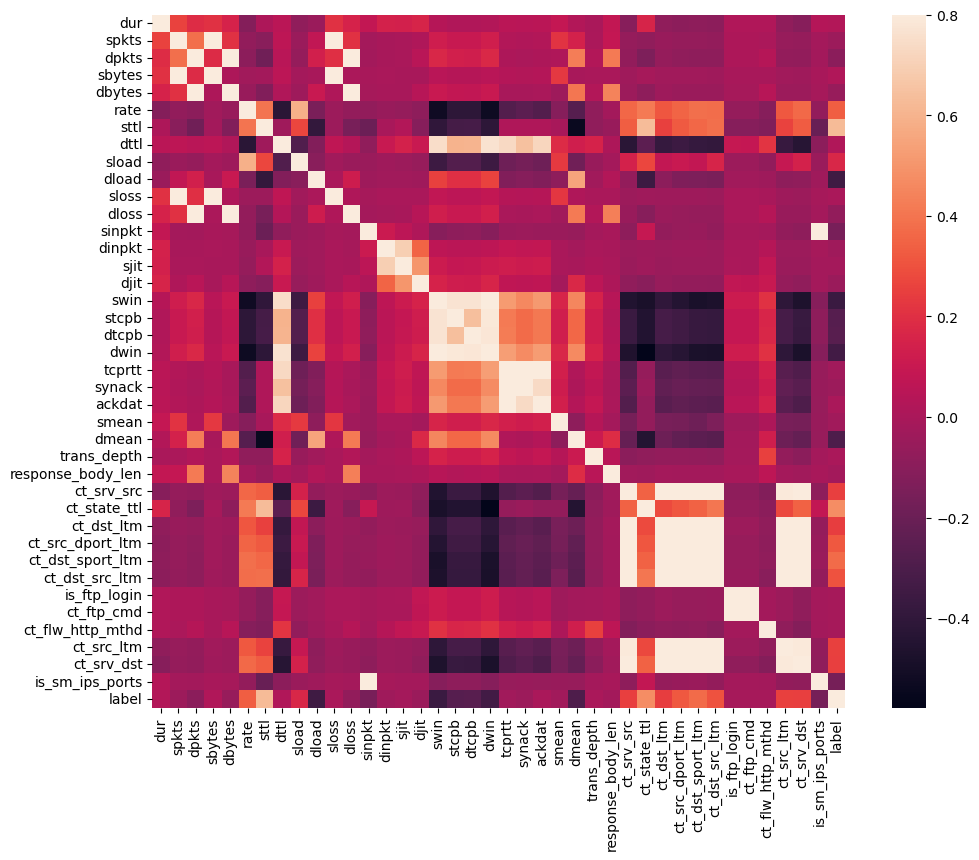

In [63]:
correlation_matrix = show_correlation(total)

In [64]:
top_correlations(correlation_matrix, limit=0.9)

spkts sbytes 0.964393217155871
spkts sloss 0.9718594116510776
dpkts dbytes 0.9734453279792796
dpkts dloss 0.979612084935938
sbytes sloss 0.9957715772406667
dbytes dloss 0.996711133831455
sinpkt is_sm_ips_ports 0.9421206232319264
swin dwin 0.9804584289136496
tcprtt synack 0.9430527539834922
tcprtt ackdat 0.9202175911910121
ct_srv_src ct_dst_src_ltm 0.9539519771685965
ct_srv_src ct_srv_dst 0.9794668130725528
ct_dst_ltm ct_src_dport_ltm 0.9615176986568883
ct_dst_ltm ct_src_ltm 0.9015817705704372
ct_src_dport_ltm ct_dst_sport_ltm 0.9083371617418114
ct_src_dport_ltm ct_src_ltm 0.9094302805367733
ct_dst_src_ltm ct_srv_dst 0.9603212131064117
is_ftp_login ct_ftp_cmd 0.9988554882935726


C:\Users\hhi20\AppData\Local\Temp\ipykernel_41824\445615014.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’


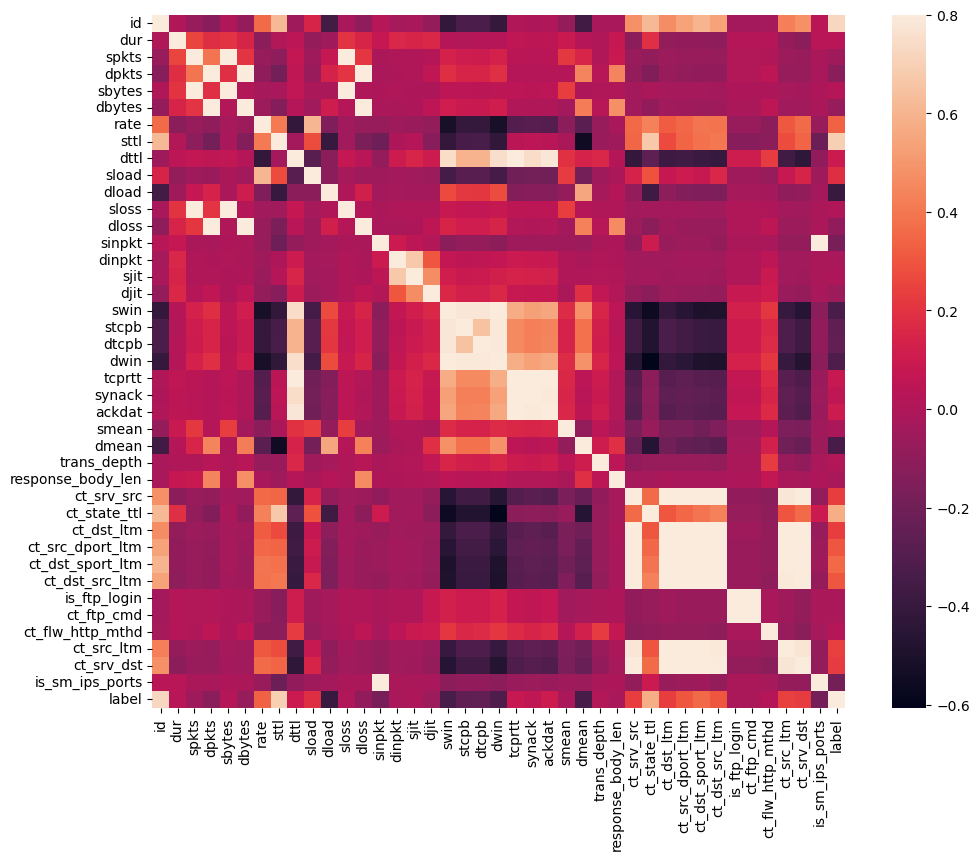

In [65]:
correlation_matrix = show_correlation(train, method='spearman')

In [66]:
top_correlations(correlation_matrix, limit=0.9)

spkts sbytes 0.9637905453658627
spkts sloss 0.9710686917738107
dpkts dbytes 0.9719070079919281
dpkts dloss 0.9786363765709863
sbytes sloss 0.9961094729148002
dbytes dloss 0.9965035947623478
sinpkt is_sm_ips_ports 0.9413189007355157
swin dwin 0.9901399299415929
tcprtt synack 0.9494676611067603
tcprtt ackdat 0.9417603738127356
ct_srv_src ct_dst_src_ltm 0.9671378245460094
ct_srv_src ct_srv_dst 0.9803230099911133
ct_dst_ltm ct_src_dport_ltm 0.9620518416459877
ct_src_dport_ltm ct_dst_sport_ltm 0.9067931558835277
ct_dst_src_ltm ct_srv_dst 0.9723704538697349
is_ftp_login ct_ftp_cmd 1.0


# Plot utils

In [69]:
def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    if method != None:
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()
    
def catplot(data, col):
    ax = sns.catplot(x=col, hue="label", col="type",data=data, kind="count", height=5, legend=False, aspect=1.4)
    ax.set_titles("{col_name}")
    ax.add_legend(loc='upper right',labels=['normal','attack'])
    plt.show(ax)

In [70]:
def create_count_df(col, data=total):
    df = pd.DataFrame(data[col].value_counts().reset_index().values, columns = [col, 'count'])
    df['percent'] = df['count'].values*100/data.shape[0]
    return df.sort_values(by='percent', ascending=False)

In [71]:
col = 'proto'
create_count_df(col, normal)

,proto,count,percent
0,tcp,39121,69.858929
1,udp,13922,24.860714
2,arp,2859,5.105357
3,ospf,64,0.114286
4,igmp,18,0.032143
5,icmp,15,0.026786
6,rtp,1,0.001786


In [72]:
create_count_df(col, anomaly)[:10]

,proto,count,percent
0,udp,49361,41.361309
1,tcp,40825,34.208696
2,unas,12084,10.125606
3,ospf,2531,2.120813
4,sctp,1150,0.963625
5,any,300,0.25138
6,gre,225,0.188535
7,sun-nd,201,0.168425
8,mobile,201,0.168425
9,ipv6,201,0.168425


In [73]:
# icmp and rtp columns are in test, but not in train data
total.loc[total[col].isin(['igmp', 'icmp', 'rtp']), col] = 'igmp_icmp_rtp'
total.loc[~total[col].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), col] = 'others'

c:\Users\hhi20\anaconda3\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


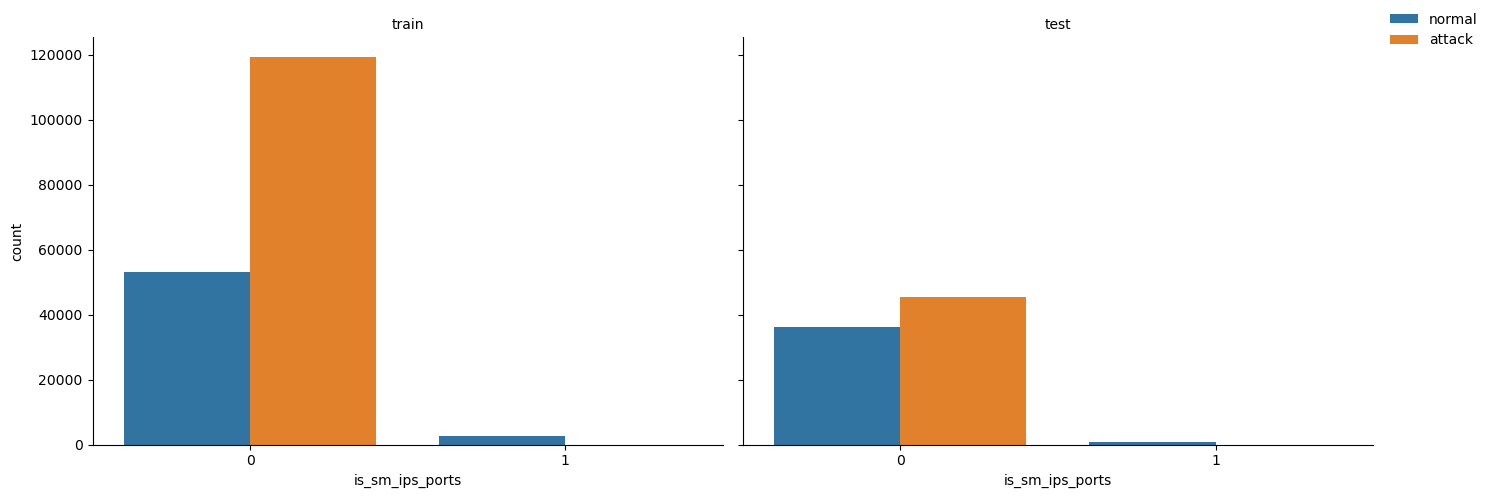

In [74]:
catplot(total, 'is_sm_ips_ports')

0.9988554882935726 -0.008761579815051115


c:\Users\hhi20\anaconda3\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


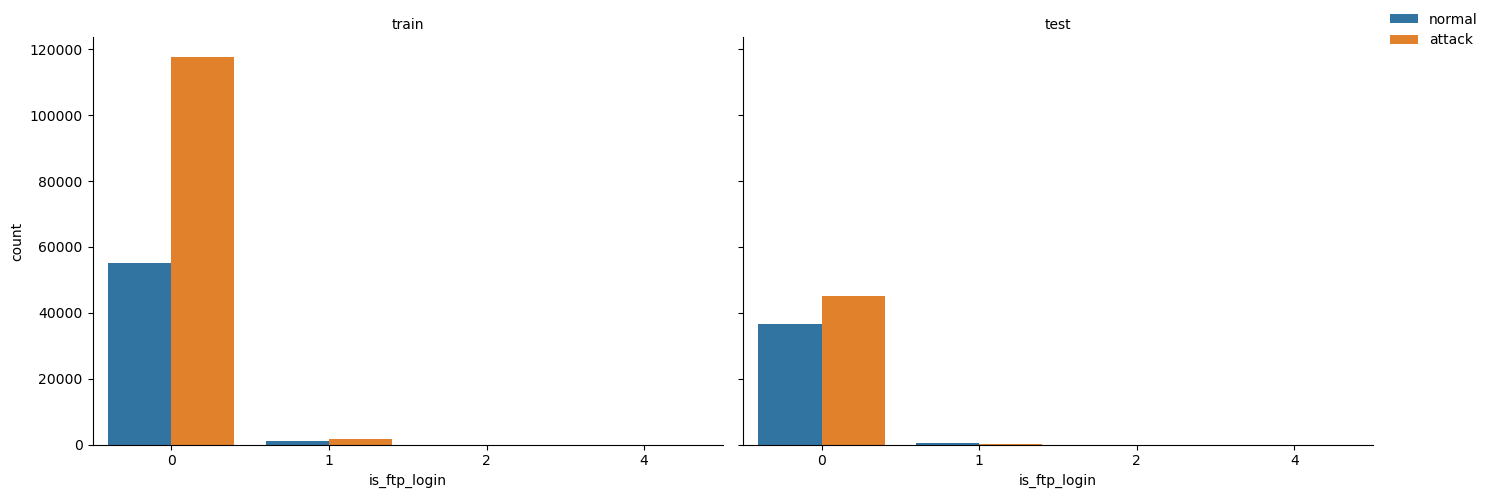

In [75]:
col = 'is_ftp_login'
print(corr('ct_ftp_cmd', col), corr('is_ftp_login', 'label'))
catplot(total, col)
total.drop([col], axis=1, inplace=True)

c:\Users\hhi20\anaconda3\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


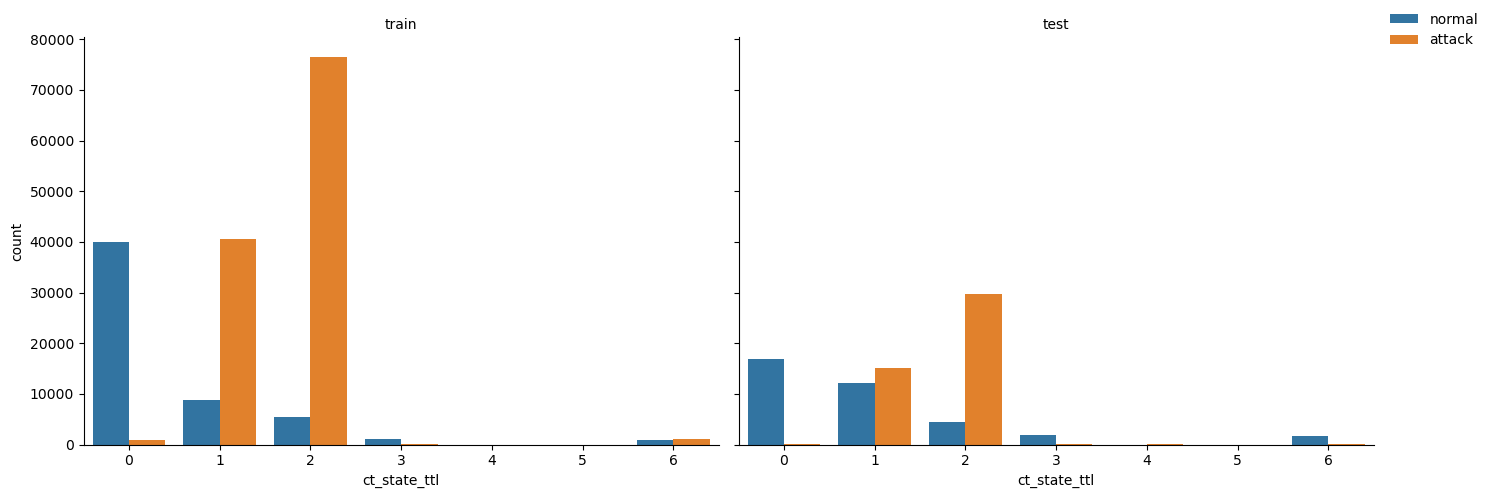

In [76]:
col = 'ct_state_ttl'
catplot(total, col)

c:\Users\hhi20\anaconda3\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


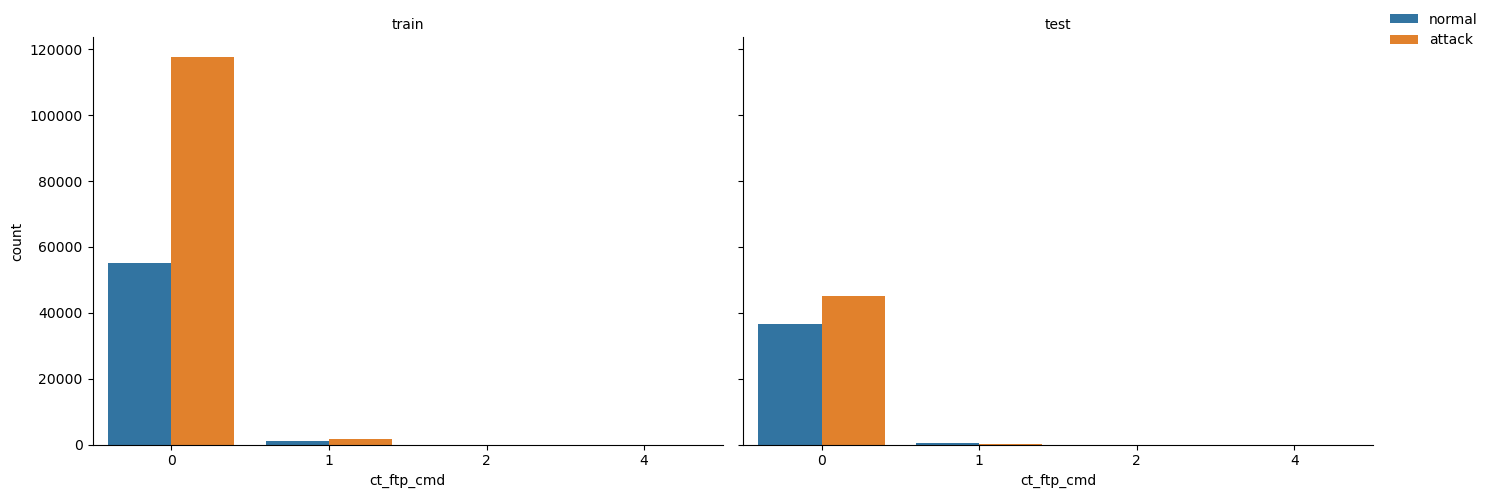

-0.009091577232666164

In [77]:
catplot(total, 'ct_ftp_cmd')
corr('ct_ftp_cmd', 'label')

In [78]:
create_count_df(col, total)

,ct_state_ttl,count,percent
0,2,116154,45.078064
1,1,76589,29.723332
2,0,57836,22.445503
3,6,3734,1.449124
4,3,3331,1.292724
5,4,28,0.010866
6,5,1,0.000388


In [79]:
print(find_corr(total['spkts']*total['smean'], total['sbytes'])) # 0.999999
print(find_corr(total['dpkts']*total['dmean'], total['dbytes'])) # 0.99999
print(corr('sbytes', 'sloss'), corr('dbytes', 'dloss')) # 0.995771577240429, 0.9967111338305503
total.drop(['sbytes', 'dbytes'], axis=1, inplace=True)

0.9999999770938806
0.9999999748988752
0.9957715772406667 0.996711133831455


C:\Users\hhi20\AppData\Local\Temp\ipykernel_41824\3600892346.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
C:\Users\hhi20\AppData\Local\Temp\ipykernel_41824\3600892346.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data

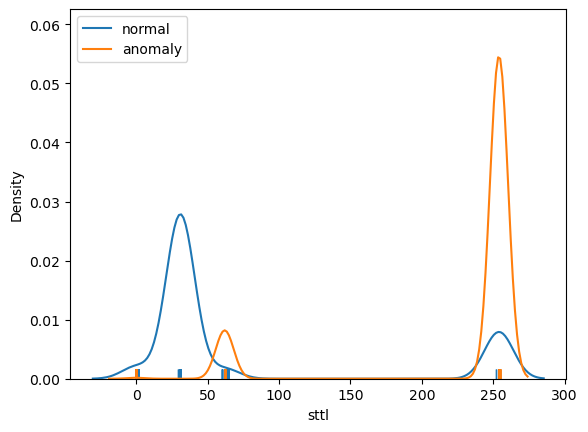

In [80]:
col = 'sttl'
dual_plot(col) # 0.62408238, after applying log1p 0.61556952425

In [81]:
total['swin'].value_counts().loc[lambda x: x>1]

0      134632
255    123021
Name: swin, dtype: int64

In [82]:
total['dwin'].value_counts().loc[lambda x: x>1]

0      137157
255    120498
27          2
Name: dwin, dtype: int64

In [83]:
print(corr('swin'), corr('dwin'))

-0.36487721423357067 -0.3391656759097319


C:\Users\hhi20\AppData\Local\Temp\ipykernel_41824\3600892346.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[col], label=label1, hist=False, rug=True)
C:\Users\hhi20\AppData\Local\Temp\ipykernel_41824\3600892346.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data

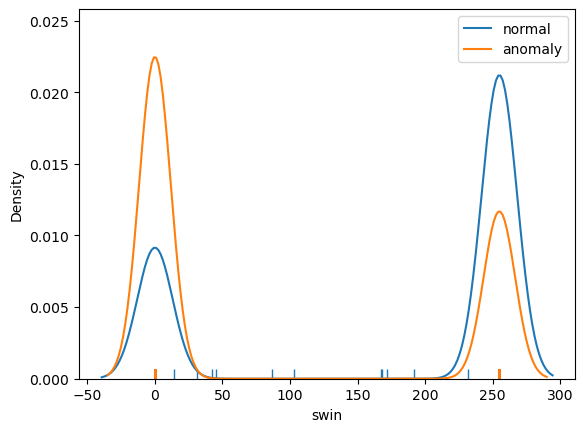

In [84]:
dual_plot('swin')

In [85]:
col = 'trans_depth'
print(corr(col)) # -0.0022256544
create_count_df(col, total)

0.0022459775335158644


,trans_depth,count,percent
0,0,232251,90.134007
1,1,25295,9.816706
2,2,108,0.041914
3,3,4,0.001552
4,4,4,0.001552
5,5,2,0.000776
6,39,2,0.000776
7,80,1,0.000388
8,155,1,0.000388
9,163,1,0.000388


In [86]:
col = 'ct_src_ltm'
print(corr(col))
create_count_df(col, total)

0.2524981765825701


,ct_src_ltm,count,percent
0,1,63870,24.787230
1,2,48965,19.002767
2,3,29180,11.324431
3,4,18863,7.320519
4,5,12297,4.772328
5,6,8573,3.327085
6,17,7613,2.954520
7,16,6817,2.645601
8,7,6263,2.430600
9,8,5804,2.252467


In [87]:
print(corr('ct_dst_ltm'))
create_count_df('ct_dst_ltm', total)

0.2407764412161283


,ct_dst_ltm,count,percent
0,1,83627,32.454700
1,2,48640,18.876638
2,3,27434,10.646828
3,4,17313,6.718981
4,5,9441,3.663946
5,6,7473,2.900187
6,16,7112,2.760087
7,17,6796,2.637451
8,7,5927,2.300202
9,18,5663,2.197747


In [88]:
features.to_csv('features.csv', index=False)
train = total[total['type']=='train'].drop(['type'], axis=1)
test = total[total['type']!='train'].drop(['type'], axis=1)
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)